# Calculation of the Secrecy Capacity

_Author:_ Karl-Ludwig Besser, Technische Universität Braunschweig, Germany

> If you are not familiar with Jupyter notebooks: The easiest way to use this notebook interactively, is to hit `Kernel --> Restart & Run All` in the menu. This will execute all cells and enable the interactive elements of the plots.  
> Alternatively, you can execute the cells one by one using `Shift+Return`

## Introduction

In the following, you will find two algorithms that allow calculating the secrecy capacity of a wiretap channel.

The first one is presented in the following publication
> S. Loyka and C. D. Charalambous, "An Algorithm for Global Maximization of Secrecy Rates in Gaussian MIMO Wiretap Channels," IEEE Trans. Commun., vol. 63, no. 6, pp. 2288–2299, Jun. 2015.

The second is from the publication
> T. Van Nguyen, Q.-D. Vu, M. Juntti, and L.-N. Tran, "A Low-Complexity Algorithm for Achieving Secrecy Capacity in MIMO Wiretap Channels," in ICC 2020 - 2020 IEEE International Conference on Communications (ICC), 2020, pp. 1–6.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from calculations_physec import secrecy_rate

## Preparation

In [2]:
# Number of Antennas
n_tx = 4
n_bob = 5
n_eve = 2

np.random.seed(10)
# (Random) Channel matrices
mat_bob = np.random.randn(n_bob, n_tx)
mat_eve = np.random.randn(n_eve, n_tx)

In [3]:
opt_cov = {}
sec_capac = {}
snr = np.arange(0, 11, 2)

### Algorithm 1

In [4]:
from loyka_algorithm import secrecy_capacity_wtc_loyka

In [5]:
opt_cov[1] = []
sec_capac[1] = []
print("This will take a few minutes...\n")
for _snr in snr:
    power = 10**(_snr/10.)
    print("Working on SNR: {} dB".format(_snr))
    _opt_cov, interm_res_norm, interm_sec_rate = secrecy_capacity_wtc_loyka(mat_bob, mat_eve, power=power, step_size=2, alpha=.1, beta=.5)
    _sec_cap = secrecy_rate(mat_bob, mat_eve, cov=_opt_cov)
    print("Secrecy capacity: {:.3f} bit".format(_sec_cap))
    print("Power constraint: {:.3f}.\tTrace of Cov: {:.3f}".format(power, np.trace(_opt_cov)))
    print("-"*60)
    opt_cov[1].append(_opt_cov)
    sec_capac[1].append(_sec_cap)

Working on SNR: 0 dB
Secrecy capacity: 3.336 bit
Power constraint: 1.000.	Trace of Cov: 1.000
Working on SNR: 2 dB
Secrecy capacity: 4.223 bit
Power constraint: 1.585.	Trace of Cov: 1.585
Working on SNR: 4 dB
Secrecy capacity: 5.228 bit
Power constraint: 2.512.	Trace of Cov: 2.512
Working on SNR: 6 dB
Secrecy capacity: 6.328 bit
Power constraint: 3.981.	Trace of Cov: 3.981
Working on SNR: 8 dB
Secrecy capacity: 7.501 bit
Power constraint: 6.310.	Trace of Cov: 6.310
Working on SNR: 10 dB
Secrecy capacity: 8.726 bit
Power constraint: 10.000.	Trace of Cov: 10.000


### Algorithm 2

In [12]:
from low_compl import secrecy_capacity_low_complexity

In [13]:
opt_cov[2] = []
sec_capac[2] = []
for _snr in snr:
    power = 10**(_snr/10.)
    print("Working on SNR: {} dB".format(_snr))
    _opt_cov = secrecy_capacity_low_complexity(mat_bob, mat_eve, power)
    _sec_cap = secrecy_rate(mat_bob, mat_eve, cov=_opt_cov)
    print("Secrecy capacity: {:.3f} bit".format(_sec_cap))
    print("Power constraint: {:.3f}.\tTrace of Cov: {:.3f}".format(power, np.real_if_close(np.trace(_opt_cov))))
    print("-"*60)
    opt_cov[2].append(_opt_cov)
    sec_capac[2].append(_sec_cap)

Working on SNR: 0 dB
Secrecy capacity: 3.336 bit
Power constraint: 1.000.	Trace of Cov: 1.000
------------------------------------------------------------
Working on SNR: 2 dB
Secrecy capacity: 4.222 bit
Power constraint: 1.585.	Trace of Cov: 1.585
------------------------------------------------------------
Working on SNR: 4 dB
Secrecy capacity: 5.227 bit
Power constraint: 2.512.	Trace of Cov: 2.512
------------------------------------------------------------
Working on SNR: 6 dB
Secrecy capacity: 6.328 bit
Power constraint: 3.981.	Trace of Cov: 3.981
------------------------------------------------------------
Working on SNR: 8 dB
Secrecy capacity: 7.500 bit
Power constraint: 6.310.	Trace of Cov: 6.310
------------------------------------------------------------
Working on SNR: 10 dB
Secrecy capacity: 8.725 bit
Power constraint: 10.000.	Trace of Cov: 10.000
------------------------------------------------------------


## Results

In [14]:
def plot_results(results):
    fig, axs = plt.subplots(num="Secrecy Capacity Results")
    axs.plot(snr, results[1], label="Loyka Algorithm")
    axs.plot(snr, results[2], label="Low Complexity Algorithm")
    axs.legend()

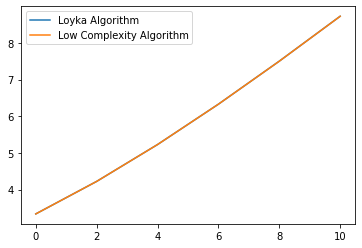

In [15]:
plot_results(sec_capac)

In [16]:
def plot_loyka_progress(res_norm, sec_rate):
    fig, axs = plt.subplots(num="Loyka Algorithm Progress")
    axs.semilogy(res_norm, label="Norm of the Residual")
    axs2 = axs.twinx()
    axs2.plot(sec_rate, c='orange', label="Secrecy Rate")
    fig.legend()

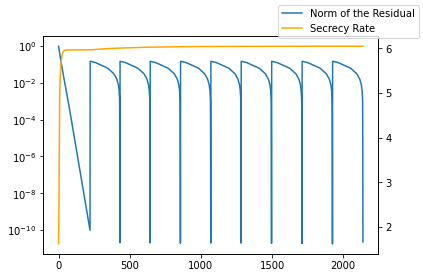

In [17]:
plot_loyka_progress(interm_res_norm, interm_sec_rate)

In [18]:
print(sec_capac)

{1: [3.335902064563813, 4.222533504193347, 5.22766810560114, 6.328403164653012, 7.501470164047583, 8.726463452650048], 2: [3.3357998968244216, 4.22233195301286, 5.227415388134251, 6.328105761536134, 7.500407567457305, 8.725117258588337]}
